In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ast
import folium
from folium import plugins
import polyline
import os
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
#from plotly.offline import plotly as py
#from plotly.offline import graph_objs as go
#import plotly.plotly as py
#import plotly.graph_objs as go
#init_notebook_mode(connected=True)
from src.data import make_dataset, data_helpers
from src.visualization import visualize
from dotenv import find_dotenv, load_dotenv
import os
import datetime


%matplotlib inline
width = 10
height = 10
matplotlib.rcParams['figure.figsize'] = [width, height]
matplotlib.rcParams.update({'font.size': 14})

# import matplotlib.style
# import matplotlib as mpl
# mpl.style.use('default')

(strava_data, drives) = make_dataset.load_data()
(morning_commutes, evening_commutes) = data_helpers.split_morning_evening(strava_data)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
morning_mask = drives['start_date_local'].dt.hour.isin(range(7, 11))
evening_mask = drives['start_date_local'].dt.hour.isin(range(14, 20))
drive_year_mask = drives["start_date_local"].dt.year == 2019
drive_time_mask = drives["elapsed_time"] > pd.Timedelta(minutes=3)
drive_morning = drives[(drives["start_date_local"].dt.hour.isin(range(7, 11))) & (drive_time_mask) & drive_year_mask]
drive_evening = drives[(drives["start_date_local"].dt.hour.isin(range(14, 20))) & (drive_time_mask) & drive_year_mask]

In [5]:
morning_commutes = morning_commutes.drop(morning_commutes.index[1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca9cee6ba8>]],
      dtype=object)

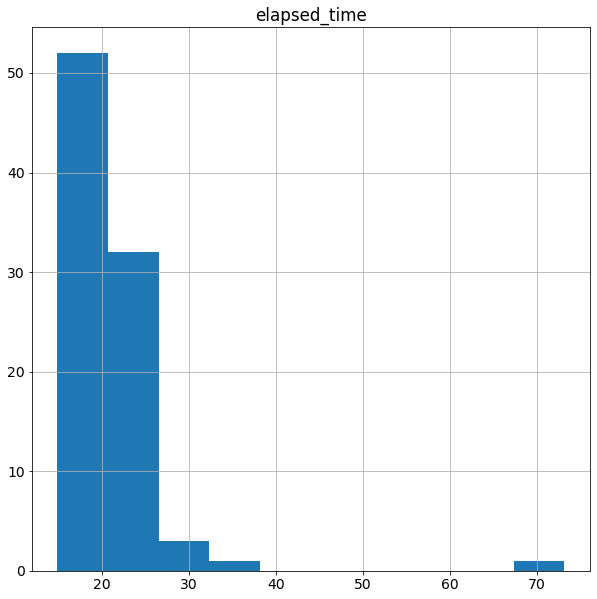

In [6]:
to_plot = visualize.prepare_for_plotting(evening_commutes)#ind = pd.Series(evening_commutes.index)

to_plot[['elapsed_time']].hist()


In [7]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
to_plot = visualize.prepare_for_plotting(morning

SyntaxError: unexpected EOF while parsing (<ipython-input-7-c5522aee0a4d>, line 2)

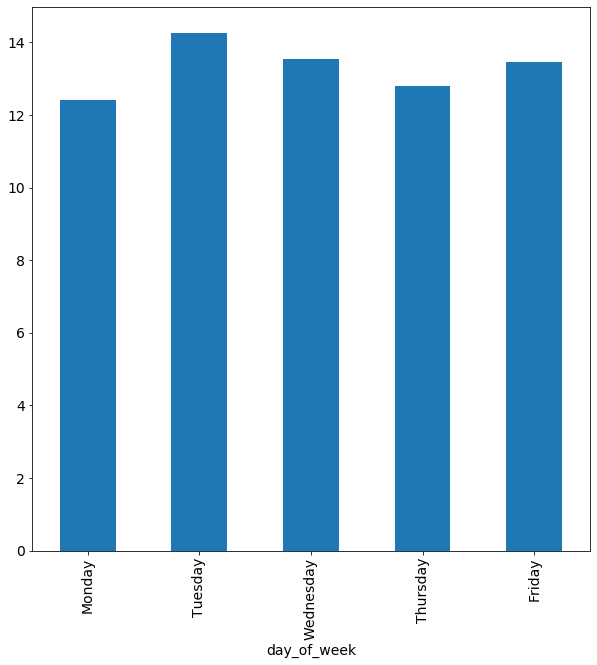

In [8]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
to_plot = visualize.prepare_for_plotting(drive_evening)
to_plot['weekdays'] = to_plot['start_date_local'].dt.weekday_name
to_plot = (to_plot.groupby('weekdays').mean())
to_plot['day_of_week'] = pd.Categorical(to_plot.index, categories=day_order, ordered=True)
to_plot = to_plot.dropna()
to_plot = to_plot.set_index('day_of_week').sort_index()
to_plot['elapsed_time'].plot(kind='bar', color='C0')

In [9]:
drive_evening['start_date_local'].groupby(pd.Grouper(freq='M'))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

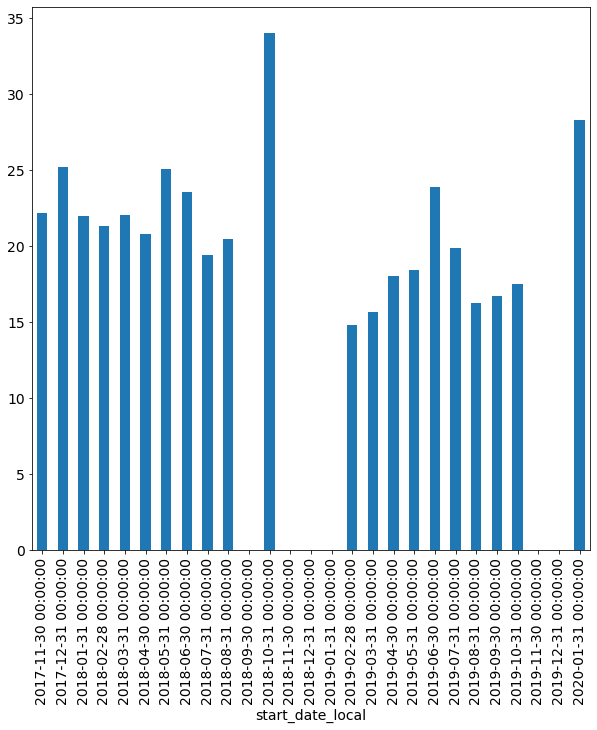

In [10]:
to_plot = visualize.prepare_for_plotting(evening_commutes)
to_plot = (to_plot.set_index('start_date_local').groupby(pd.Grouper(freq='M')).mean())
to_plot['elapsed_time'].plot(kind='bar', color='C0')

In [11]:
to_plot = visualize.prepare_for_plotting(evening_commutes)
to_plot = (to_plot.set_index('start_date_local').groupby(pd.Grouper(freq='M')).size())

In [12]:
to_plot

start_date_local
2017-11-30    7
2017-12-31    2
2018-01-31    4
2018-02-28    7
2018-03-31    3
2018-04-30    5
2018-05-31    4
2018-06-30    4
2018-07-31    9
2018-08-31    7
2018-09-30    0
2018-10-31    4
2018-11-30    0
2018-12-31    0
2019-01-31    0
2019-02-28    1
2019-03-31    2
2019-04-30    5
2019-05-31    7
2019-06-30    4
2019-07-31    1
2019-08-31    2
2019-09-30    3
2019-10-31    6
2019-11-30    0
2019-12-31    0
2020-01-31    2
Freq: M, dtype: int64

In [13]:
to_plot = visualize.prepare_for_plotting(morning_commutes)
to_plot = (to_plot.set_index('start_date_local').groupby(pd.Grouper(freq='M')).size())

In [14]:
morning_commutes.loc[:, 'date'] = morning_commutes['start_date_local'].dt.date
evening_commutes.loc[:, 'date'] = evening_commutes['start_date_local'].dt.date
morning_commutes = morning_commutes.set_index('date')
evening_commutes = evening_commutes.set_index('date')
time_between = pd.DataFrame((evening_commutes['start_date_local'].subtract(morning_commutes['start_date_local'])).dropna())
time_between.rename(columns= {"start_date_local" : 'timediff'}, inplace=True)

/home/greg/.virtualenvs/commute_analysis/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/greg/.virtualenvs/commute_analysis/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
time_between.loc[:, 'timediff'] = 

SyntaxError: invalid syntax (<ipython-input-15-0bfcac918017>, line 1)

TypeError: invalid type promotion

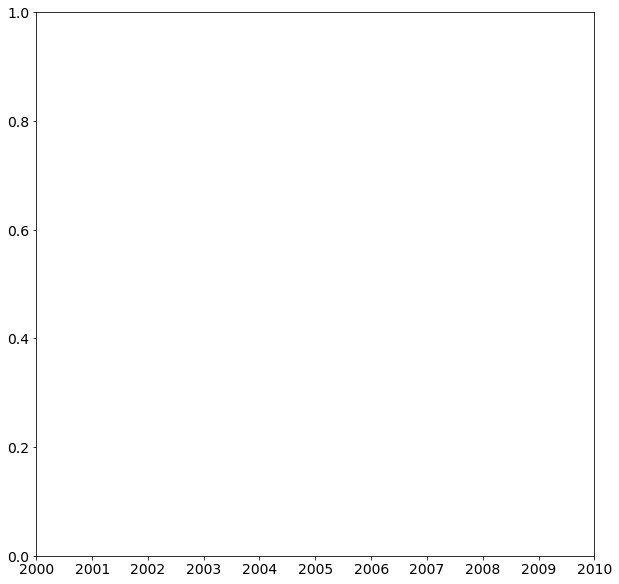

In [16]:
plt.scatter(x=time_between.index, y=time_between['timediff'])

In [ ]:
time_between.index.to_pydatetime()

In [17]:
time_between.index.to_series().to_pydatetime()

AttributeError: 'Series' object has no attribute 'to_pydatetime'

In [18]:
time_between

,timediff
date,
2017-11-14,08:48:27
2017-11-16,08:32:44
2017-12-07,07:17:28
2017-12-14,07:48:49
2018-01-10,07:06:14
2018-01-23,09:11:23
2018-01-24,07:22:25
2018-01-30,09:17:33
2018-02-01,09:14:02
